# Machine learning on MNIST

## Import libraries

In [70]:
%load_ext autoreload
%autoreload 2

import random
import gzip, pickle
import numpy as np
import matplotlib.pyplot as plt

from src.activations import Tanh, Sigmoid, Softmax, ReLU, PReLU, Swish
from src.losses import MSE
from src.layers import Dense
from src.model import Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [71]:
def load_data():
    with gzip.open('data/mnist.pkl.gz', 'rb') as f:
        f.seek(0)
        training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
        return (training_data, validation_data, test_data)

In [72]:
training_data, validation_data, test_data = load_data()

[5 0 4 1 9 2]


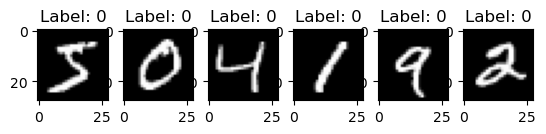

In [73]:
def view_image(images):
    n: int = len(images)
    f = plt.figure()

    for i in range(n):
        f.add_subplot(1, n, i + 1)
        reshape_img = images[i].reshape((28, 28))
        normalize_img = reshape_img/255
        plt.title('Label: {label}'.format(label = np.argmax(training_data[1][i])))
        plt.imshow(normalize_img, cmap="gray")
        #plt.show(block=True)


view_image(training_data[0][:6])

print(training_data[1][:6])


In [74]:
input = training_data[0]

output = np.zeros((training_data[1].shape[0], 10))
for i in range(training_data[1].shape[0]):
    output[i, training_data[1][i]] = 1

input = input.reshape((50000, 784, 1))
output = output.reshape((50000, 10, 1))

## Define model

In [75]:
%reload_ext autoreload

network = [
    Dense(784, 128),
    Tanh(),
    Dense(128, 40),
    Tanh(),
    Dense(40, 10),
    Softmax()
]

model = Model(network, MSE())

## Train model

In [77]:
model.train(input, output, epochs=1, learning_rate=0.1)

epoch 1/1   error=0.065450


In [78]:
model.test(input, output)

error=0.055798


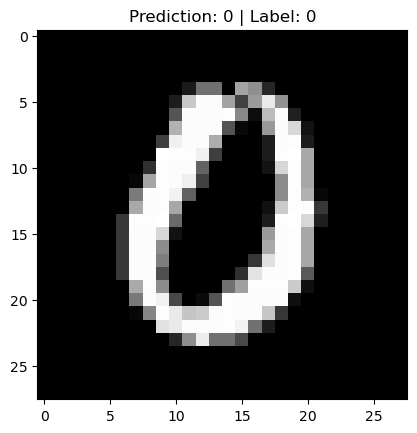

In [90]:
def view_prediction(index, input, output):
    prediction = model.predict(input[index, :])

    k = input[index, :].reshape((28, 28))

    plt.title('Prediction: {pred} | Label: {label}'.format(
        pred=np.argmax(prediction), label=np.argmax(output[index])))
    plt.imshow(k, cmap='gray')


view_prediction(random.randint(0, input.shape[0]), input, output)


In [23]:
input_test = test_data[0].reshape((10000, 784, 1))

output_test = np.zeros((test_data[1].shape[0], 10))
for i in range(test_data[1].shape[0]):
    output_test[i, test_data[1][i]] = 1

output_test = output_test.reshape((10000, 10, 1))

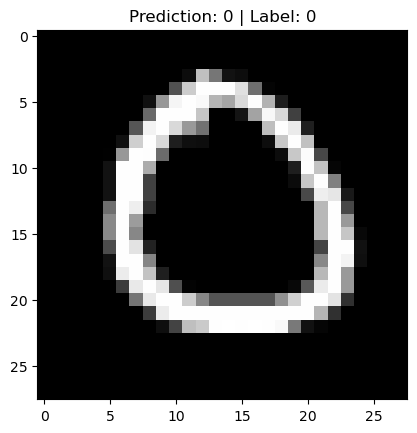

In [27]:
view_prediction(random.randint(0, test_data[0].shape[0]), input_test, output_test)

In [73]:
def global_check(x, y):
    error_list = []

    for i in range(len(x)):
        prediction = model.predict(x[i,:])
        if(np.argmax(prediction) != np.argmax(y[i])):
            error_list.append(i)
    
    return error_list

error_list = global_check(input, output)

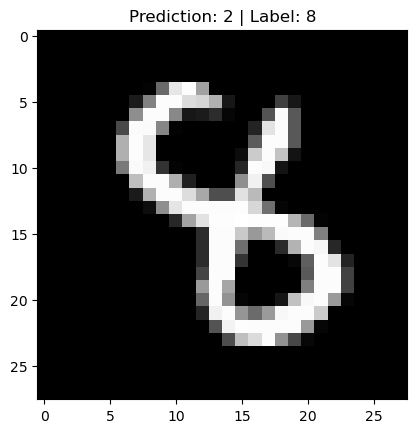

In [79]:
view_prediction(error_list[random.randint(0, len(error_list))], input, output)

In [76]:
print(len(error_list))

7100
